In [28]:
!pip install seaborn

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import pandas_datareader as pdr
import yfinance as yf

In [68]:
from matplotlib import rcParams

In [11]:
Netflix = pd.read_csv("https://raw.githubusercontent.com/Oferbtzvi30/Netflix-behavior/main/netflix-rotten-tomatoes-metacritic-imdb.csv")

In [12]:
Netflix.info(memory_usage='depp')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13545 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw

In [13]:
netflix = Netflix = pd.read_csv("https://raw.githubusercontent.com/Oferbtzvi30/Netflix-behavior/main/netflix-rotten-tomatoes-metacritic-imdb.csv")
netflix['Release Date']= pd.to_datetime(netflix['Release Date'])
netflix['Netflix Release Date']= pd.to_datetime(netflix['Netflix Release Date'])

In [14]:
netflix.head(3)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube


How many rows and columns there are in this data set?

In [16]:
netflix.shape

(15480, 29)

Before we analysing the data it's importanat to understand the data, here we going to find the percentage of missing values in each columns.

In [18]:
netflix.isnull().mean().round(3) * 100

Title                     0.0
Genre                    11.0
Tags                      0.4
Languages                12.5
Series or Movie           0.0
Hidden Gem Score         13.6
Country Availability      0.1
Runtime                   0.0
Director                 30.4
Writer                   28.0
Actors                   12.4
View Rating              45.4
IMDb Score               13.6
Rotten Tomatoes Score    58.8
Metacritic Score         72.0
Awards Received          60.8
Awards Nominated For     50.5
Boxoffice                74.1
Release Date             13.6
Netflix Release Date      0.0
Production House         66.7
Netflix Link              0.0
IMDb Link                14.9
Summary                   0.1
IMDb Votes               13.6
Image                     0.0
Poster                   23.5
TMDb Trailer             53.5
Trailer Site             53.5
dtype: float64

As we can see there are many missing values in the various features so I decide to keep the most important columns in my opinion, even if they have different missing values that we will then remove, and to drop other columns that I consider superfluous for the analysis also for the large number of missing values they have;

In [19]:
nt = netflix.drop(columns=['Production House','Boxoffice','Metacritic Score','Image','Poster','Netflix Link','IMDb Link','Trailer Site','TMDb Trailer'])

In [20]:
for column in nt.columns:
  nt.rename(columns = {column:column.replace(' ', '_').lower()}, inplace=True)

for column in nt.select_dtypes(object).columns:
  nt[column] = nt[column].str.strip().str.lower()

nt.head(1)

,title,genre,tags,languages,series_or_movie,hidden_gem_score,country_availability,runtime,director,writer,actors,view_rating,imdb_score,rotten_tomatoes_score,awards_received,awards_nominated_for,release_date,netflix_release_date,summary,imdb_votes
0,lets fight ghost,"crime, drama, fantasy, horror, romance","comedy programmes,romantic tv comedies,horror ...","swedish, spanish",series,4.3,thailand,< 30 minutes,tomas alfredson,john ajvide lindqvist,"kåre hedebrant, per ragnar, lina leandersson, ...",r,7.9,98.0,74.0,57.0,2008-12-12,2021-03-04,a med student with a supernatural gift tries t...,205926.0


In [22]:
df_genre = nt["genre"].value_counts()
df_genre

comedy                                                                                     1152
drama                                                                                       951
documentary                                                                                 441
comedy, drama                                                                               423
comedy, romance                                                                             412
                                                                                           ... 
animation, comedy, sci-fi                                                                     1
animation, comedy, drama, music, musical, romance                                             1
action, drama, fantasy, horror, thriller                                                      1
animation, action, adventure, comedy, crime, family, fantasy, mystery, sci-fi, thriller       1
adventure, drama, fantasy, romance, thri

In [36]:
df = nt['netflix_release_date'] < '2021-01-01'
nt=nt[df]

In [37]:
nt['month_added'] = nt['netflix_release_date'].dt.month
nt['day_added'] = nt['netflix_release_date'].dt.day
nt.head(2)

,title,genre,tags,languages,series_or_movie,hidden_gem_score,country_availability,runtime,director,writer,...,awards_received,awards_nominated_for,release_date,netflix_release_date,summary,imdb_votes,netflix_release_date_year,netflix_release_date_quarter,month_added,day_added
434,mighty oak,"comedy, drama","dramas,us movies",english,movie,7.3,"south korea,australia",1-2 hour,sean mcnamara,matt allen,...,NaN,NaN,2020-07-07,2020-12-31,as she continues to grapple with the loss of h...,244.0,2020,4,12,31
435,heroes reborn,"drama, fantasy, sci-fi, thriller","tv dramas,us tv shows,fantasy tv shows,sci-fi tv",english,series,3.4,japan,< 30 minutes,NaN,tim kring,...,NaN,5.0,2015-09-24,2020-12-31,"as the world faces terrifying threats, a growi...",26662.0,2020,4,12,31


Title: Tells us the name of the movie / series
Genre: Describes the genre of the movie / series
Tag: is a list of tags on the movie / series
Language: Indicates in which language the film / series is available
Series or Movie: Indicates whether this product is a TV series or a movie
Hidden Gem Score: This is a score that suggests if this movie / series is a hidden gem (i.e. something that is not mainstream but is a great product and may deserve more attention)
Country Availability: Please indicate in which country this film / series is available
Runtime: Indicates the duration of the movie or an episode of the series
Director: Tells us how is the director of this product
Writer: Tells us how is the writer of this product,
Actors:Tells us how are the main actors of this product,
View Rating: Indicates the rating of the product,
IMDb Score: This is the score given to the product by IMDb, Rotten Tomatoes Score: This is the score given to the product by Rotten Tomatoes,
Awards Received: It tells us how much awards this film/serie has received ,
Awards Nominated For: It tells us for which awards this film/movie has been nominated,
Release Date: It indicates when this product has been released,
Netflix Release Date: It indicates when this product has been released on Netflix,
Summary: It tells us a little summary of the plot of the product,
IMDb Votes: It indicates the scores given by IMDb,
Image: An Image
Released_Year: It indicates the year the product was released
Released_Year_Net: It indicates the year the product was released on Netflix

In [24]:
nt["netflix_release_date_year"] = nt['netflix_release_date'].dt.year
nt["netflix_release_date_quarter"] = nt['netflix_release_date'].dt.quarter
nt.head(2)

,title,genre,tags,languages,series_or_movie,hidden_gem_score,country_availability,runtime,director,writer,...,imdb_score,rotten_tomatoes_score,awards_received,awards_nominated_for,release_date,netflix_release_date,summary,imdb_votes,netflix_release_date_year,netflix_release_date_quarter
434,mighty oak,"comedy, drama","dramas,us movies",english,movie,7.3,"south korea,australia",1-2 hour,sean mcnamara,matt allen,...,4.8,NaN,NaN,NaN,2020-07-07,2020-12-31,as she continues to grapple with the loss of h...,244.0,2020,4
435,heroes reborn,"drama, fantasy, sci-fi, thriller","tv dramas,us tv shows,fantasy tv shows,sci-fi tv",english,series,3.4,japan,< 30 minutes,NaN,tim kring,...,6.7,NaN,NaN,5.0,2015-09-24,2020-12-31,"as the world faces terrifying threats, a growi...",26662.0,2020,4


Movie & Series - What's more?

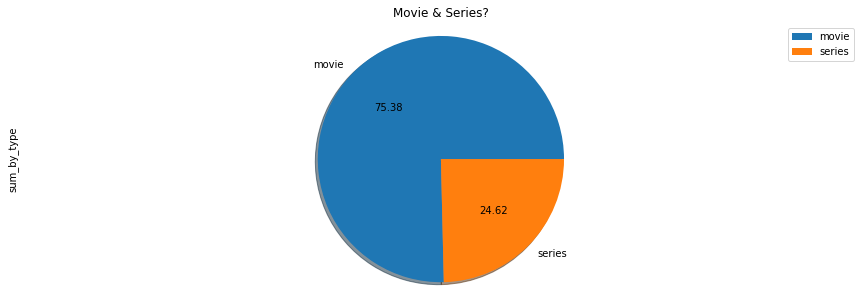

In [25]:
df= nt.groupby('series_or_movie').agg(sum_by_type = ('title','count')).sort_values('sum_by_type', ascending = False)

rank_type = df['sum_by_type'].rank(method = 'dense', ascending = False)
df['rank'] = rank_type

df.plot(
    y = 'sum_by_type',
    kind = 'pie',
    title = 'Movie & Series?',
    legend = True,
    figsize = (15,5),
    shadow = True,
    autopct = '%.2f')
plt.axis('equal');

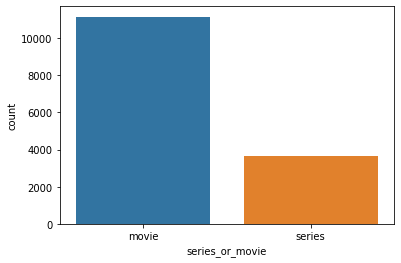

In [30]:
serices_movies = sns.countplot(x="series_or_movie", data=nt)

In [31]:
movies_netflix_filter = nt['series_or_movie'].str.contains("movie",case = False)
series_netflix_filter = nt['series_or_movie'].str.contains("series",case = False)
movies_netflix=nt[movies_netflix_filter]
series_netflix=nt[series_netflix_filter]

Distribution of rating ratings by movies

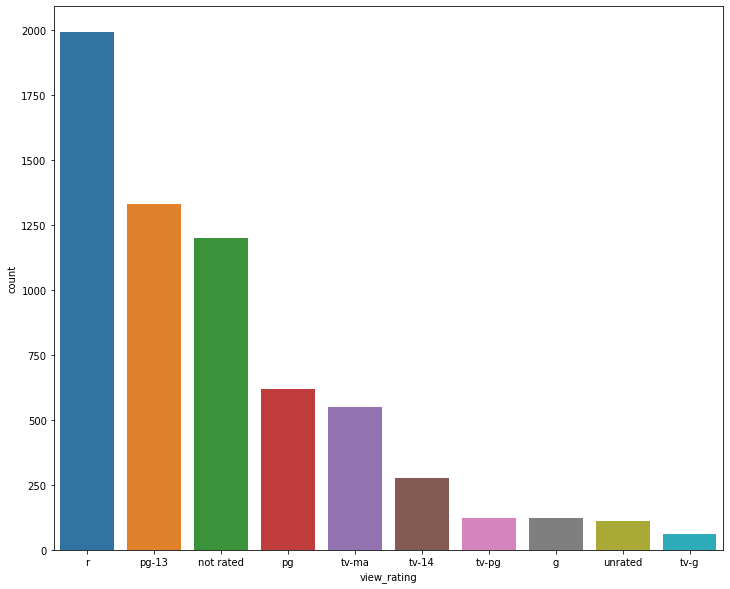

In [32]:
plt.figure(figsize=(12,10))
nt_movies = sns.countplot(x="view_rating",data=movies_netflix,order=movies_netflix['view_rating'].value_counts().index[0:10])

Distribution of rating ratings by series

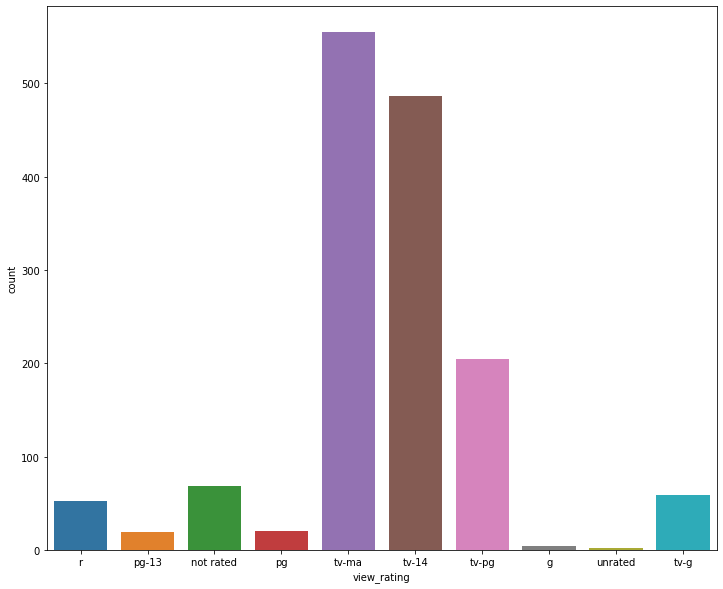

In [33]:
plt.figure(figsize=(12,10))
nt_series = sns.countplot(x="view_rating",data=series_netflix,order=movies_netflix['view_rating'].value_counts().index[0:10])

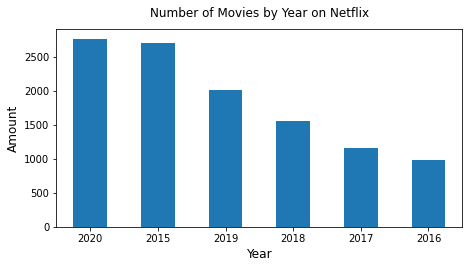

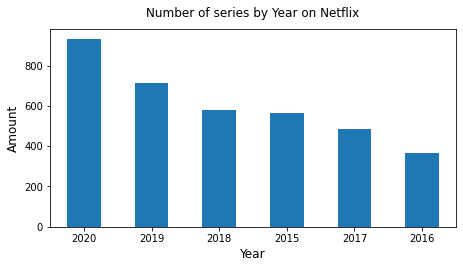

In [34]:
plt.subplot(2,2,1)
net = movies_netflix['netflix_release_date_year'].value_counts()[:10].plot.bar(figsize=(16,8))
plt.xticks(rotation = 0)
plt.title('Number of Movies by Year on Netflix', pad = 12, fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Amount',fontsize = 12)
plt.show()


plt.subplot(2,2,1)
net = series_netflix['netflix_release_date_year'].value_counts()[:10].plot.bar(figsize=(16,8))
plt.xticks(rotation = 0)
plt.title('Number of series by Year on Netflix', pad = 12, fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Amount',fontsize = 12)
plt.show()

In [39]:
nt['series_or_movie'].drop_duplicates

<bound method Series.drop_duplicates of 434       movie
435      series
436       movie
437       movie
438       movie
          ...  
15475    series
15476    series
15477    series
15478    series
15479    series
Name: series_or_movie, Length: 14795, dtype: object>

In [48]:
group = nt.groupby(['series_or_movie'])
years = pd.DataFrame({'Movies':group.get_group('movie').groupby('netflix_release_date_year').count()['title'], 
                      'Series':group.get_group('series').groupby('netflix_release_date_year').count()['title']})

group = nt.groupby(['series_or_movie'])
months = pd.DataFrame({'Movies':group.get_group('movie').groupby('month_added').count()['title'], 
                      'Series':group.get_group('series').groupby('month_added').count()['title']})



<AxesSubplot:xlabel='netflix_release_date_year'>

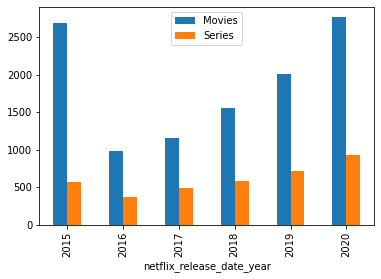

In [41]:
years.plot.bar()

<AxesSubplot:xlabel='month_added'>

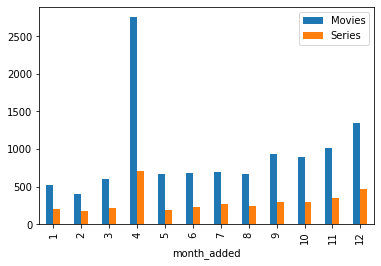

In [45]:
months.plot.bar()

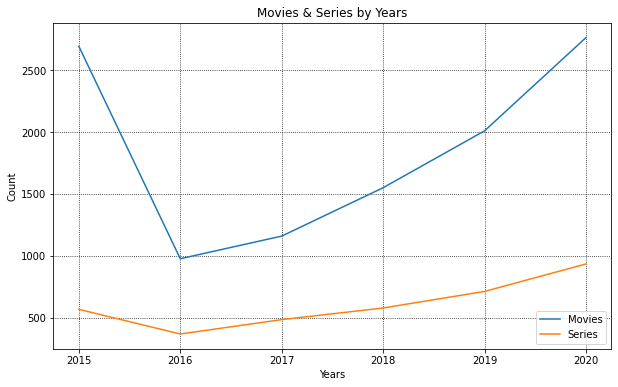

[*********************100%***********************]  1 of 1 completed


(0.0, 800.0)

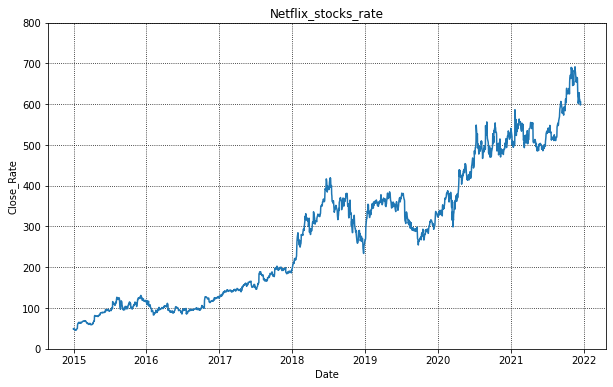

In [89]:
plt.plot(years)
plt.title ("Movies & Series by Years")
plt.grid(True, color = 'k', linestyle=':')
plt.legend(['Movies','Series'])
plt.xlabel("Years")
plt.ylabel("Count")
plt.show()

rcParams['figure.figsize'] = 10,6
ticker = ['NFLX']
start = dt.datetime(2015,1,1)
nflx_data = yf.download(ticker,start )['Close']

plt.plot(nflx_data)
plt.grid(True, color = 'k', linestyle=':')
plt.title("Netflix_stocks_rate")
plt.xlabel("Date")
plt.ylabel("Close_Rate")
plt.ylim(0,800)


Boxoffice vs Scores accross by types (Boxoffice | Rotten Tomatoes Score | Metacritic Score | 'Hidden Gem Score', 'IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score' | Platform | Score )